In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

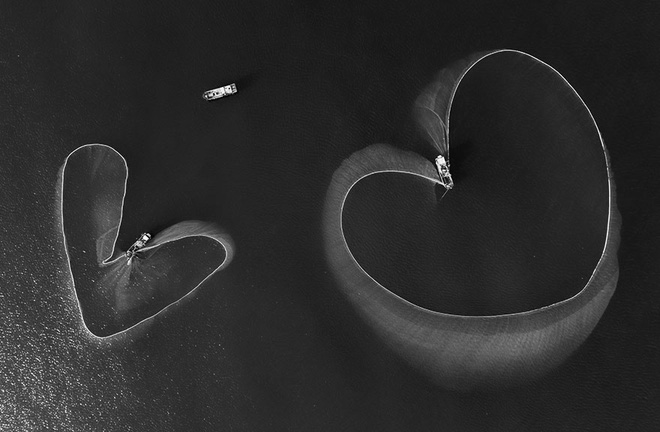

In [6]:
# Load a color image to a greyscale image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/1.DL/anh-vn.jpg',0)
#Show the image
cv2_imshow(img)

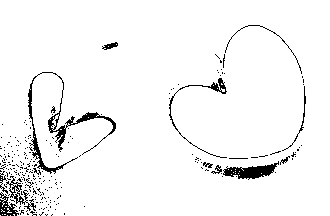

In [7]:
img_resized = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2)))
gray_r = img_resized.reshape(img_resized.shape[0]*img_resized.shape[1])
mean = gray_r.mean()*2

for i in range(gray_r.shape[0]):
    if gray_r[i] > mean:
        gray_r[i] = 0  
    else:
        gray_r[i] = 255
gray = gray_r.reshape(img_resized.shape[0],img_resized.shape[1])
cv2_imshow(gray)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


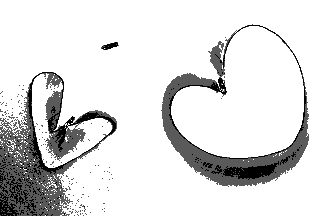

In [9]:
img_resized = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2)))
gray_r = img_resized.reshape(img_resized.shape[0]*img_resized.shape[1])
mean = gray_r.mean()

for i in range(gray_r.shape[0]):
    if gray_r[i] > mean*2:
        gray_r[i] = 0  
    elif  gray_r[i] > mean*1.3:
        gray_r[i] = 90
    else:
        gray_r[i] = 255
gray = gray_r.reshape(img_resized.shape[0],img_resized.shape[1])
cv2_imshow(gray)


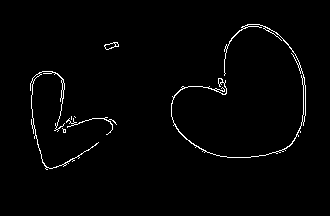

In [10]:
img_resized = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2)))
edge3 = cv2.Canny(img_resized,200,500)
cv2_imshow(edge3)

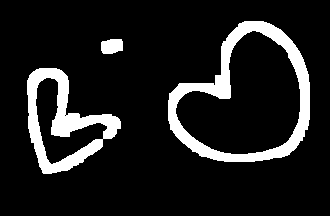

In [11]:
kernel = np.ones((8,8),np.uint8)
dilation = cv2.dilate(edge3,kernel,iterations = 1)
cv2_imshow(dilation)

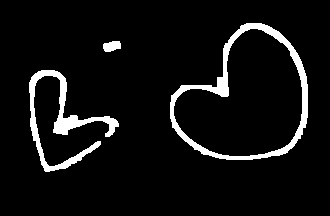

In [12]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
cv2_imshow(erosion)

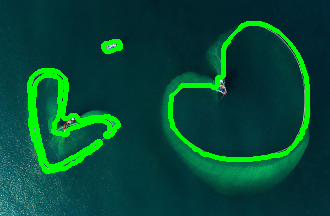

In [14]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/1.DL/anh-vn.jpg',1)
img_resized = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2)))

contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_segmented = cv2.drawContours(img_resized, contours, -1, (0, 255, 0), 3) #The last parameter is thickness, negative for filling
cv2_imshow(image_segmented)

In [16]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/1.DL/anh-vn.jpg',1)
pic_n = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
pic_n.shape

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

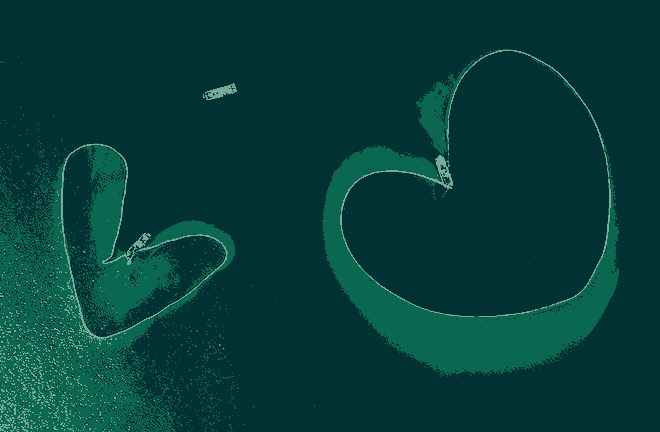

In [17]:
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
cv2_imshow(cluster_pic)